<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<ipython-input-60-296e1ed00aa8>:23: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
<ipython-input-60-296e1ed00aa8>:35: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


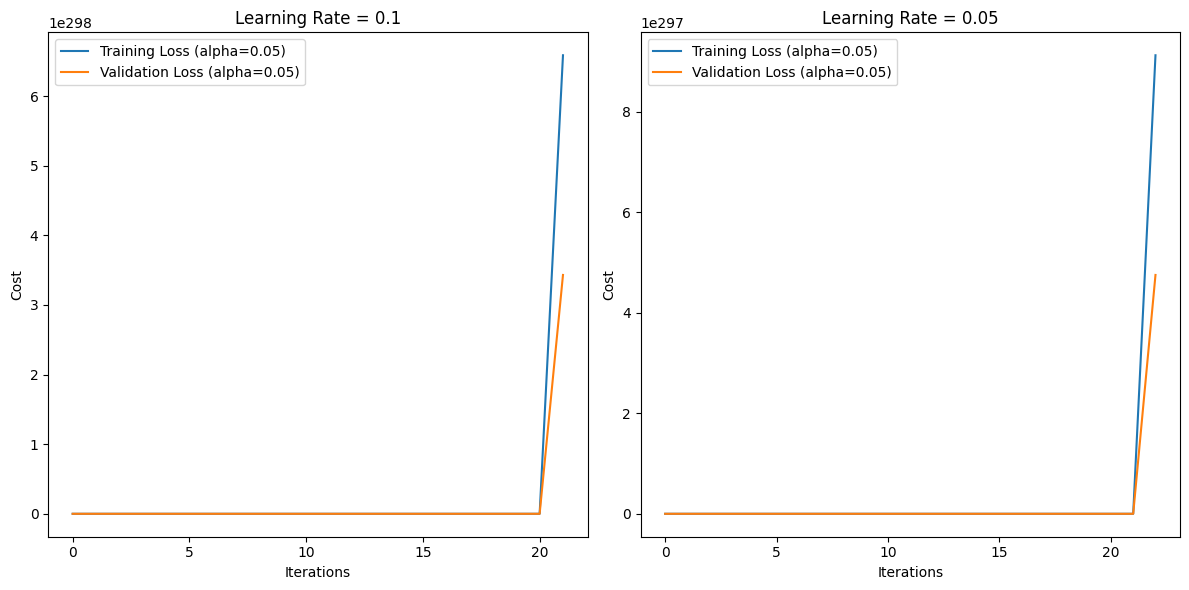

Final Theta (alpha=0.1): [nan nan nan nan nan nan]
Test Cost (alpha=0.1): nan
Final Theta (alpha=0.05): [nan nan nan nan nan nan]
Test Cost (alpha=0.05): nan


In [60]:
#problem 1a
# Select features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Add a column of ones to X (for the intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into 80% training and 20% validation (testing)
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, num_iters):
    """Perform gradient descent, track training and validation losses."""
    m = len(y)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Compute gradients
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients

        # Compute and store training and validation costs
        train_cost = compute_cost(X, y, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Training parameters
num_iters = 1000  # Number of iterations

# Initialize theta (parameters)
theta_init = np.zeros(X_train.shape[1])

# Explore learning rate of 0.1
alpha_1 = 0.1
theta_1, train_cost_history_1, val_cost_history_1 = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha_1, num_iters)

# Explore learning rate of 0.03
alpha_2 = 0.05
theta_2, train_cost_history_2, val_cost_history_2 = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha_2, num_iters)

# Plot the training and validation loss for both learning rates
plt.figure(figsize=(12, 6))

# Plot for learning rate 0.1
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), train_cost_history_1, label='Training Loss (alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_1, label='Validation Loss (alpha=0.05)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.1')
plt.legend()

# Plot for learning rate 0.05
plt.subplot(1, 2, 2)
plt.plot(range(num_iters), train_cost_history_2, label='Training Loss (alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_2, label='Validation Loss (alpha=0.05)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.05')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the test cost for both learning rates
test_cost_1 = compute_cost(X_val, y_val, theta_1)
test_cost_2 = compute_cost(X_val, y_val, theta_2)

# Print results
print(f"Final Theta (alpha=0.1): {theta_1}")
print(f"Test Cost (alpha=0.1): {test_cost_1}")
print(f"Final Theta (alpha=0.05): {theta_2}")
print(f"Test Cost (alpha=0.05): {test_cost_2}")


<ipython-input-58-dbb2a712e662>:28: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)


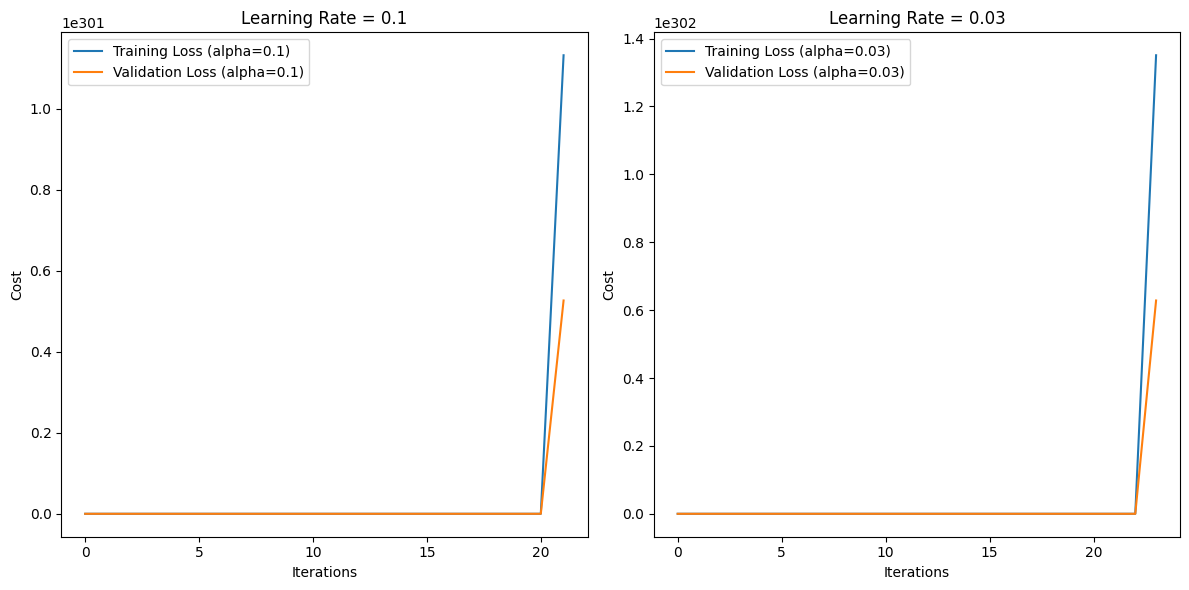

Final Theta (alpha=0.1): [nan nan nan nan nan nan nan nan nan nan nan nan]
Validation Cost (alpha=0.1): nan
Final Theta (alpha=0.03): [nan nan nan nan nan nan nan nan nan nan nan nan]
Validation Cost (alpha=0.03): nan


In [58]:
#problem 1b
# Convert categorical features ('yes'/'no') into binary (1/0)
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = data[[
    'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']].replace({'yes': 1, 'no': 0})

# Select features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values.reshape(-1, 1)

# Add a column of ones to X (for the intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into 80% training and 20% validation (testing)
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Reshape y_train and y_val to be 1D arrays instead of column vectors
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)

# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    return cost

# Gradient Descent function with validation set loss tracking
def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, num_iters):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Compute gradients
        gradients = (1/m) * X_train.T.dot(hypothesis(X_train, theta) - y_train)  # Correct shape (12,)
        theta -= alpha * gradients  # Ensure theta update matches shape of gradients

        # Compute and store training and validation costs
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Training parameters
num_iters = 1000  # Number of iterations
theta_init = np.zeros(X_train.shape[1])  # Initialize theta (parameters)

# Learning rate 0.1
alpha_1 = 0.1
theta_1, train_cost_history_1, val_cost_history_1 = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha_1, num_iters)

# Learning rate 0.03
alpha_2 = 0.03
theta_2, train_cost_history_2, val_cost_history_2 = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha_2, num_iters)

# Plot the training and validation loss for both learning rates
plt.figure(figsize=(12, 6))

# Plot for learning rate 0.1
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), train_cost_history_1, label='Training Loss (alpha=0.1)')
plt.plot(range(num_iters), val_cost_history_1, label='Validation Loss (alpha=0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.1')
plt.legend()

# Plot for learning rate 0.03
plt.subplot(1, 2, 2)
plt.plot(range(num_iters), train_cost_history_2, label='Training Loss (alpha=0.03)')
plt.plot(range(num_iters), val_cost_history_2, label='Validation Loss (alpha=0.03)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.03')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the test cost for both learning rates
test_cost_1 = compute_cost(X_val, y_val, theta_1)
test_cost_2 = compute_cost(X_val, y_val, theta_2)

# Print results
print(f"Final Theta (alpha=0.1): {theta_1}")
print(f"Validation Cost (alpha=0.1): {test_cost_1}")
print(f"Final Theta (alpha=0.03): {theta_2}")
print(f"Validation Cost (alpha=0.03): {test_cost_2}")


<ipython-input-68-0c3a29c28b18>:41: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)


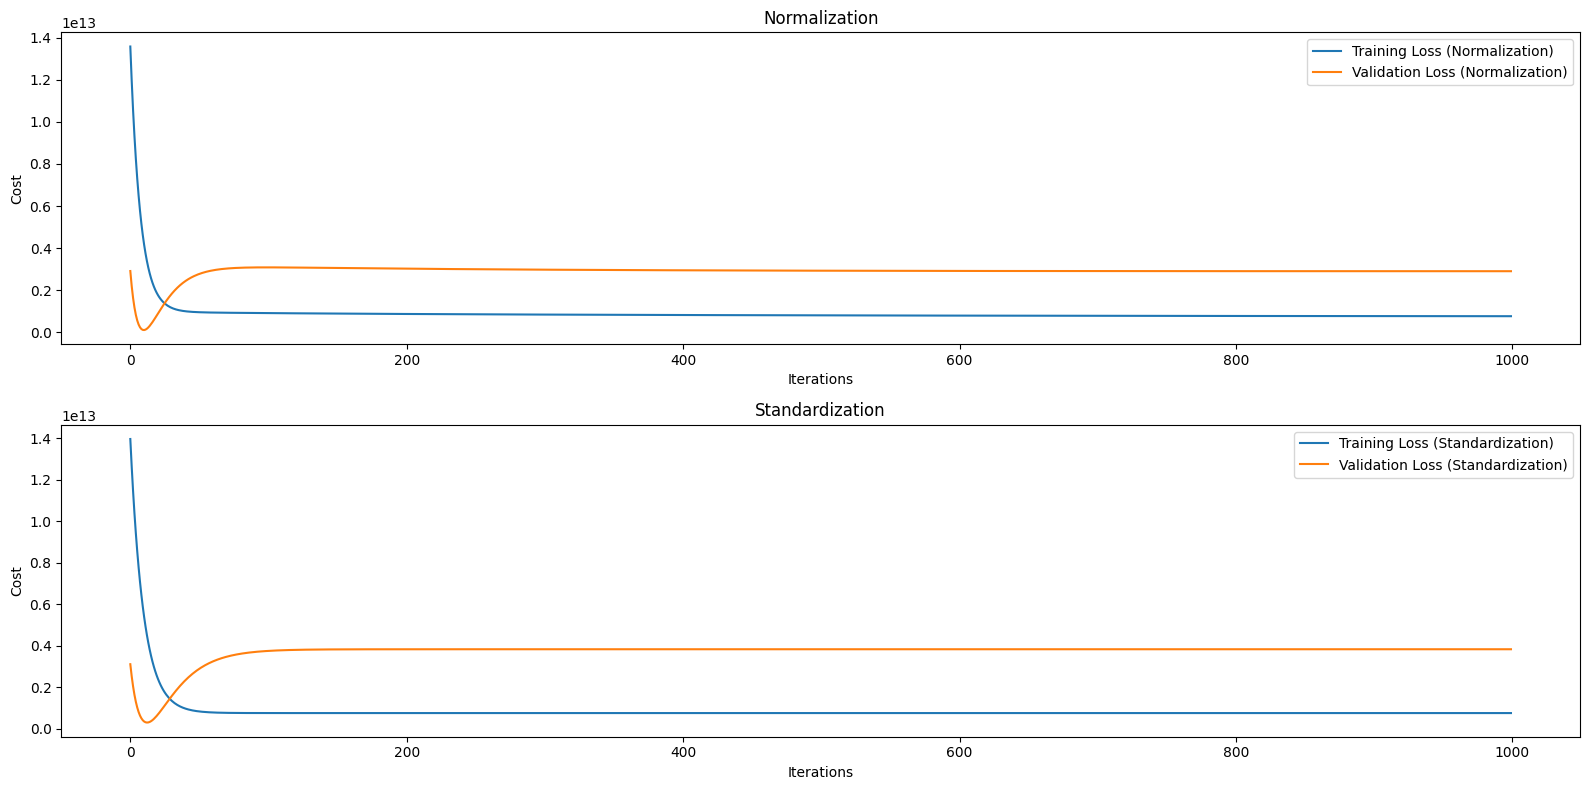

Final Validation Cost (Baseline): nan
Final Validation Cost (Normalization): 2906205572743.941
Final Validation Cost (Standardization): 3825406340589.083


In [68]:
#problem 2a
import numpy as np
import matplotlib.pyplot as plt

# Select features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Add a column of ones to X (for the intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into 80% training and 20% validation (testing)
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:]
y_val = y[train_size:]

# Function to normalize data (excluding intercept)
def normalize(X):
    X_min = X[:, 1:].min(axis=0)  # Skip the intercept column
    X_max = X[:, 1:].max(axis=0)
    X_norm = X.copy()
    X_norm[:, 1:] = (X[:, 1:] - X_min) / (X_max - X_min)  # Only normalize features, not intercept
    return X_norm

# Function to standardize data (excluding intercept)
def standardize(X):
    X_mean = X[:, 1:].mean(axis=0)  # Skip the intercept column
    X_std = X[:, 1:].std(axis=0)
    X_stdized = X.copy()
    X_stdized[:, 1:] = (X[:, 1:] - X_mean) / X_std  # Only standardize features, not intercept
    return X_stdized

# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    return cost

# Gradient descent function
def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, num_iters):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        gradients = (1/m) * X_train.T.dot(hypothesis(X_train, theta) - y_train)
        theta -= alpha * gradients

        # Compute and store training and validation costs
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Training parameters
num_iters = 1000  # Number of iterations
alpha = 0.05  # Learning rate

# Initialize theta (parameters)
theta_init = np.zeros(X_train.shape[1])

# 1. Baseline (No scaling)
theta_base, train_cost_history_base, val_cost_history_base = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha, num_iters)

# 2. Normalization (excluding intercept)
X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)
theta_norm, train_cost_history_norm, val_cost_history_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, theta_init.copy(), alpha, num_iters)

# 3. Standardization (excluding intercept)
X_train_std = standardize(X_train)
X_val_std = standardize(X_val)
theta_std, train_cost_history_std, val_cost_history_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, theta_init.copy(), alpha, num_iters)

# Plot the training and validation loss for baseline, normalization, and standardization
plt.figure(figsize=(16, 8))


# Plot for Normalization
plt.subplot(2, 1, 1)
plt.plot(range(num_iters), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(num_iters), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalization')
plt.legend()

# Plot for Standardization
plt.subplot(2, 1, 2)
plt.plot(range(num_iters), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(num_iters), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardization')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the validation cost for each approach
test_cost_base = compute_cost(X_val, y_val, theta_base)
test_cost_norm = compute_cost(X_val_norm, y_val, theta_norm)
test_cost_std = compute_cost(X_val_std, y_val, theta_std)

# Print the final costs
print(f"Final Validation Cost (Baseline): {test_cost_base}")
print(f"Final Validation Cost (Normalization): {test_cost_norm}")
print(f"Final Validation Cost (Standardization): {test_cost_std}")


<ipython-input-73-69f1b4305331>:38: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)


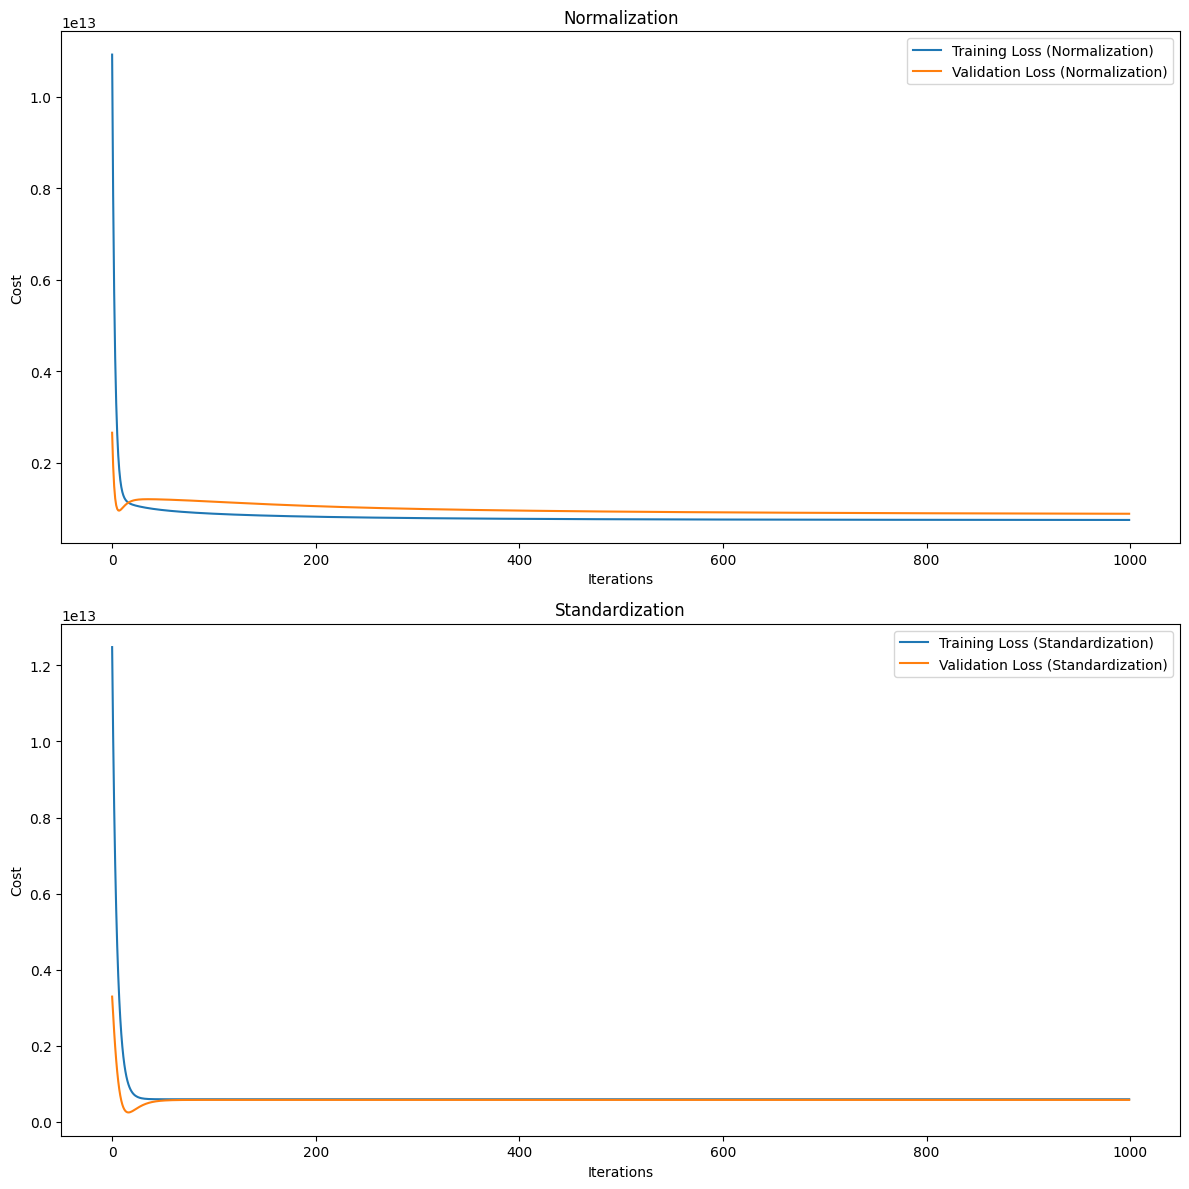

Final Validation Cost (Normalization): 884781839676.5277
Final Validation Cost (Standardization): 578216996169.7562
Final Validation Cost (Baseline): nan


In [73]:
#problem 2b

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
          ]].replace({'yes': 1, 'no': 0}).values
y = data['price'].values

# Add a column of ones to X (for the intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into 80% training and 20% validation (testing)
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:]
y_val = y[train_size:]

# Normalize the features (scaling between 0 and 1)
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)

# Standardize the features (zero mean, unit variance)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)

# Hypothesis function remains the same
def hypothesis(X, theta):
    return np.dot(X, theta)

# Cost function remains the same
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    return cost

# Gradient Descent function remains the same
def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, num_iters):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Compute gradients
        gradients = (1/m) * X_train.T.dot(hypothesis(X_train, theta) - y_train)
        theta -= alpha * gradients

        # Compute and store training and validation costs
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Training parameters
num_iters = 1000
alpha = 0.1
theta_init = np.zeros(X_train.shape[1])

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[:, 1:])  # Only standardize the features (exclude intercept)
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]  # Add back the intercept term

X_val_std = scaler_std.transform(X_val[:, 1:])  # Standardize validation set
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]  # Add back the intercept term

# Train for Normalization
theta_norm, train_cost_history_norm, val_cost_history_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, theta_init.copy(), alpha, num_iters)

# Train for Standardization
theta_std, train_cost_history_std, val_cost_history_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, theta_init.copy(), alpha, num_iters)

# Baseline model (without scaling, just for comparison)
theta_base, train_cost_history_base, val_cost_history_base = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha, num_iters)

# Plot the training and validation loss for Normalization, Standardization, and Baseline
plt.figure(figsize=(12, 12))

# Plot for Normalization
plt.subplot(2, 1, 1)
plt.plot(range(num_iters), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(num_iters), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalization')
plt.legend()

# Plot for Standardization
plt.subplot(2, 1, 2)
plt.plot(range(num_iters), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(num_iters), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardization')
plt.legend()

plt.tight_layout()
plt.show()

# Compare final validation costs for all three approaches
print(f"Final Validation Cost (Normalization): {val_cost_history_norm[-1]}")
print(f"Final Validation Cost (Standardization): {val_cost_history_std[-1]}")
print(f"Final Validation Cost (Baseline): {val_cost_history_base[-1]}")


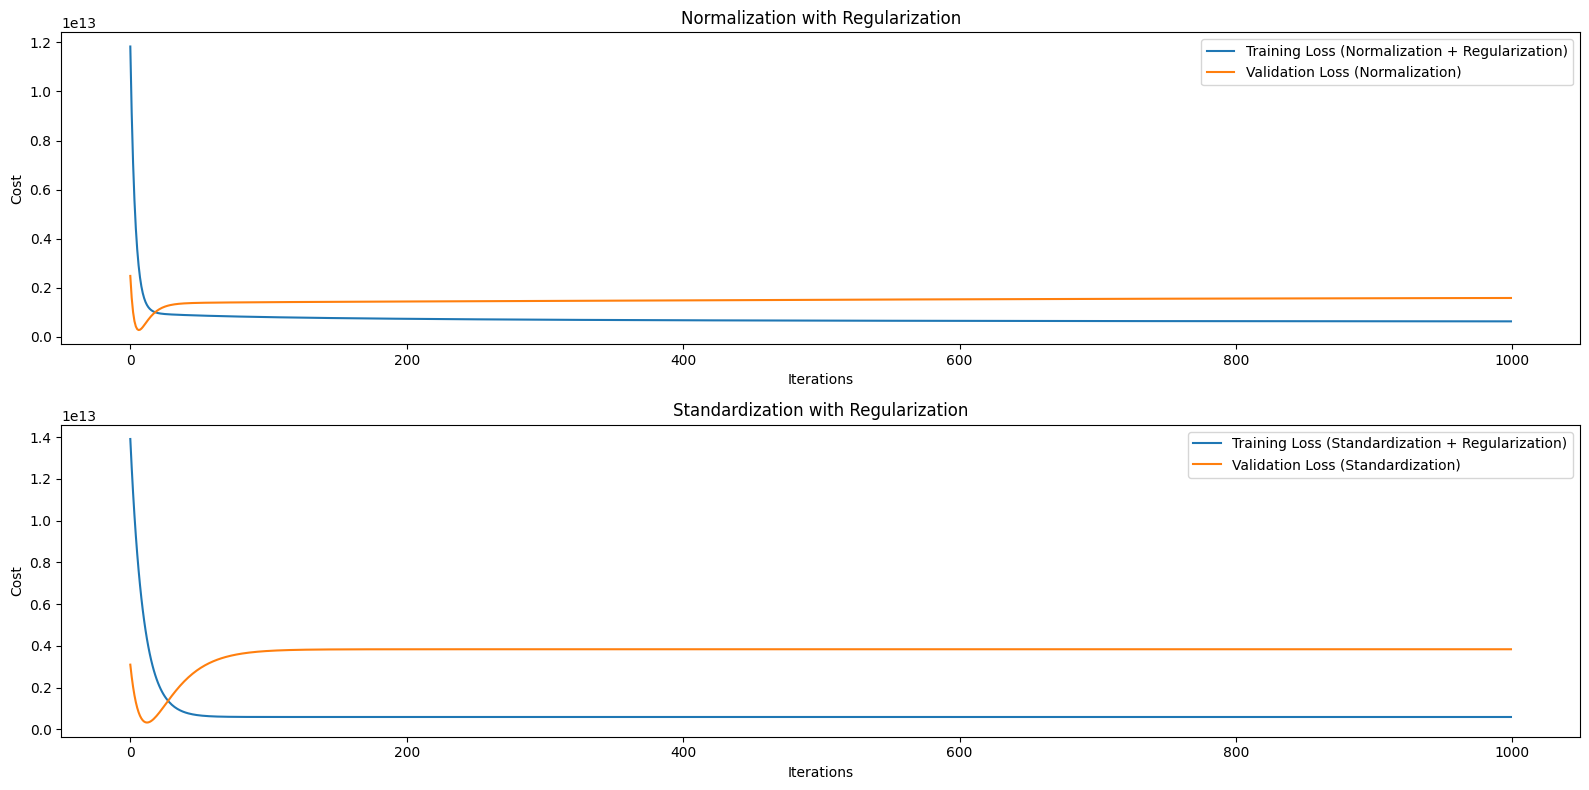

Final Validation Cost (Normalization + Regularization): 1583970573156.0652
Final Validation Cost (Standardization + Regularization): 3840941622093.784


In [74]:
# Regularized Cost function with L2 penalty (excluding bias term)
def compute_cost_with_regularization(X, y, theta, lambda_):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    reg_term = (lambda_ / (2*m)) * np.sum(theta[1:]**2)  # Exclude theta_0 from regularization
    return cost + reg_term

# Regularized Gradient Descent function
def gradient_descent_with_regularization(X_train, y_train, X_val, y_val, theta, alpha, lambda_, num_iters):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Compute gradients (with regularization for theta_1 to theta_n, excluding theta_0)
        gradients = (1/m) * X_train.T.dot(hypothesis(X_train, theta) - y_train)
        theta[1:] -= alpha * (gradients[1:] + (lambda_ / m) * theta[1:])  # Regularize theta_1 to theta_n
        theta[0] -= alpha * gradients[0]  # Do not regularize theta_0 (bias term)

        # Compute and store training and validation costs (regularized training cost)
        train_cost = compute_cost_with_regularization(X_train, y_train, theta, lambda_)
        val_cost = compute_cost(X_val, y_val, theta)  # No regularization on validation set

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Parameters for training
num_iters = 1000  # Number of iterations
alpha = 0.05  # Learning rate
lambda_ = 1.0  # Regularization parameter (you can adjust this to test different levels of regularization)

# Initialize theta (parameters)
theta_init = np.zeros(X_train.shape[1])

# 1. Normalization with regularization
X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)
theta_norm, train_cost_history_norm, val_cost_history_norm = gradient_descent_with_regularization(
    X_train_norm, y_train, X_val_norm, y_val, theta_init.copy(), alpha, lambda_, num_iters)

# 2. Standardization with regularization
X_train_std = standardize(X_train)
X_val_std = standardize(X_val)
theta_std, train_cost_history_std, val_cost_history_std = gradient_descent_with_regularization(
    X_train_std, y_train, X_val_std, y_val, theta_init.copy(), alpha, lambda_, num_iters)

# Plot the training and validation loss for Normalization and Standardization
plt.figure(figsize=(16, 8))

# Plot for Normalization
plt.subplot(2, 1, 1)
plt.plot(range(num_iters), train_cost_history_norm, label='Training Loss (Normalization + Regularization)')
plt.plot(range(num_iters), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalization with Regularization')
plt.legend()

# Plot for Standardization
plt.subplot(2, 1, 2)
plt.plot(range(num_iters), train_cost_history_std, label='Training Loss (Standardization + Regularization)')
plt.plot(range(num_iters), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardization with Regularization')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the validation cost for each approach with regularization
test_cost_norm = compute_cost(X_val_norm, y_val, theta_norm)
test_cost_std = compute_cost(X_val_std, y_val, theta_std)

# Print the final costs
print(f"Final Validation Cost (Normalization + Regularization): {test_cost_norm}")
print(f"Final Validation Cost (Standardization + Regularization): {test_cost_std}")


<ipython-input-73-69f1b4305331>:38: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)


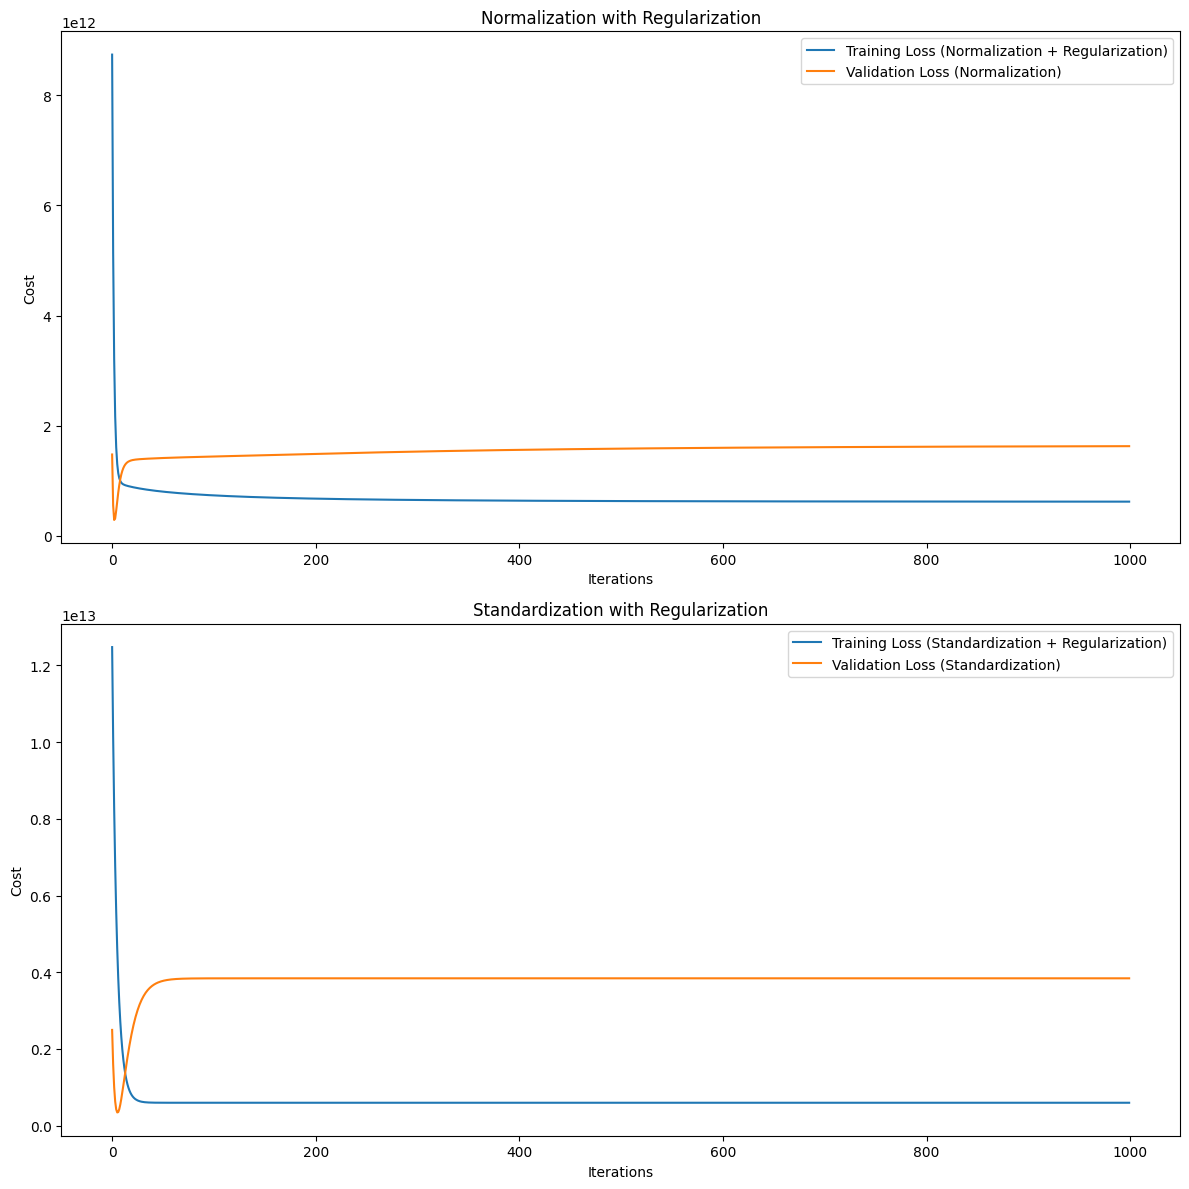

Final Validation Cost (Normalization + Regularization): 1628926794303.3855
Final Validation Cost (Standardization + Regularization): 3840941622103.019
Final Validation Cost (Baseline): nan


In [75]:
# Regularized cost function (L2) for training set
def compute_cost_with_regularization(X, y, theta, lambda_):
    m = len(y)
    cost = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2)
    reg_term = (lambda_ / (2*m)) * np.sum(theta[1:]**2)  # Exclude bias term from regularization
    return cost + reg_term

# Regularized Gradient Descent function
def gradient_descent_with_regularization(X_train, y_train, X_val, y_val, theta, alpha, lambda_, num_iters):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Compute gradients
        gradients = (1/m) * X_train.T.dot(hypothesis(X_train, theta) - y_train)
        # Regularize theta_1 to theta_n, but not theta_0 (bias)
        theta[1:] -= alpha * (gradients[1:] + (lambda_ / m) * theta[1:])  # Regularize only theta_1 to theta_n
        theta[0] -= alpha * gradients[0]  # Do not regularize theta_0 (bias)

        # Compute and store training cost (with regularization) and validation cost (no regularization)
        train_cost = compute_cost_with_regularization(X_train, y_train, theta, lambda_)
        val_cost = compute_cost(X_val, y_val, theta)  # Validation cost does not include regularization

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# Training parameters
num_iters = 1000
alpha = 0.1
lambda_ = 1.0  # Regularization parameter

# Train with regularization (Normalization)
theta_norm_reg, train_cost_history_norm_reg, val_cost_history_norm_reg = gradient_descent_with_regularization(
    X_train_norm, y_train, X_val_norm, y_val, theta_init.copy(), alpha, lambda_, num_iters)

# Train with regularization (Standardization)
theta_std_reg, train_cost_history_std_reg, val_cost_history_std_reg = gradient_descent_with_regularization(
    X_train_std, y_train, X_val_std, y_val, theta_init.copy(), alpha, lambda_, num_iters)

# Baseline model without regularization
theta_base, train_cost_history_base, val_cost_history_base = gradient_descent(X_train, y_train, X_val, y_val, theta_init.copy(), alpha, num_iters)

# Plot the training and validation loss for Normalization, Standardization, and Baseline with Regularization
plt.figure(figsize=(12, 12))

# Plot for Normalization with Regularization
plt.subplot(2, 1, 1)
plt.plot(range(num_iters), train_cost_history_norm_reg, label='Training Loss (Normalization + Regularization)')
plt.plot(range(num_iters), val_cost_history_norm_reg, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalization with Regularization')
plt.legend()

# Plot for Standardization with Regularization
plt.subplot(2, 1, 2)
plt.plot(range(num_iters), train_cost_history_std_reg, label='Training Loss (Standardization + Regularization)')
plt.plot(range(num_iters), val_cost_history_std_reg, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardization with Regularization')
plt.legend()

plt.tight_layout()
plt.show()

# Compare final validation costs for all three approaches
print(f"Final Validation Cost (Normalization + Regularization): {val_cost_history_norm_reg[-1]}")
print(f"Final Validation Cost (Standardization + Regularization): {val_cost_history_std_reg[-1]}")
print(f"Final Validation Cost (Baseline): {val_cost_history_base[-1]}")
